In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')
df.head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes


In [3]:
df.drop("customerID", axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df['InternetService'] = df['InternetService'].replace(0, 'No')
for i in df.columns:
    print(f"Column Name: {i} null values: {df[i].isna().sum()} \n unique values: {df[i].unique()}" )

Column Name: Gender null values: 0 
 unique values: ['Female' 'Male']
Column Name: SeniorCitizen null values: 0 
 unique values: [0 1]
Column Name: Partner null values: 0 
 unique values: ['Yes' 'No']
Column Name: Dependents null values: 0 
 unique values: ['No' 'Yes']
Column Name: Tenure null values: 0 
 unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column Name: PhoneService null values: 0 
 unique values: ['No' 'Yes']
Column Name: MultipleLines null values: 0 
 unique values: ['No' 'Yes']
Column Name: InternetService null values: 0 
 unique values: ['DSL' 'Fiber optic' 'No']
Column Name: OnlineSecurity null values: 0 
 unique values: ['No' 'Yes']
Column Name: OnlineBackup null values: 0 
 unique values: ['Yes' 'No']
Column Name: DeviceProtection null values: 0 
 unique values: ['No' 'Yes']
Colu

In [6]:
df.replace({"No":0, "Yes": 1}, inplace=True)

In [7]:
#any values that cannot be converted to int, it will be replaced with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df[df["TotalCharges"].isna()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Manual,20.25,NaN,0
936,Female,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Manual,80.85,NaN,0
1082,Male,0,1,1,0,1,1,0,0,0,0,0,0,0,Two year,0,Manual,25.75,NaN,0
1340,Female,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,0
3331,Male,0,1,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Manual,19.85,NaN,0
3826,Male,0,1,1,0,1,1,0,0,0,0,0,0,0,Two year,0,Manual,25.35,NaN,0
4380,Female,0,1,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Manual,20.00,NaN,0
5218,Male,0,1,1,0,1,0,0,0,0,0,0,0,0,One year,1,Manual,19.70,NaN,0
6670,Female,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Manual,73.35,NaN,0


In [8]:
df.dropna(subset=["TotalCharges"], inplace=True)

In [9]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

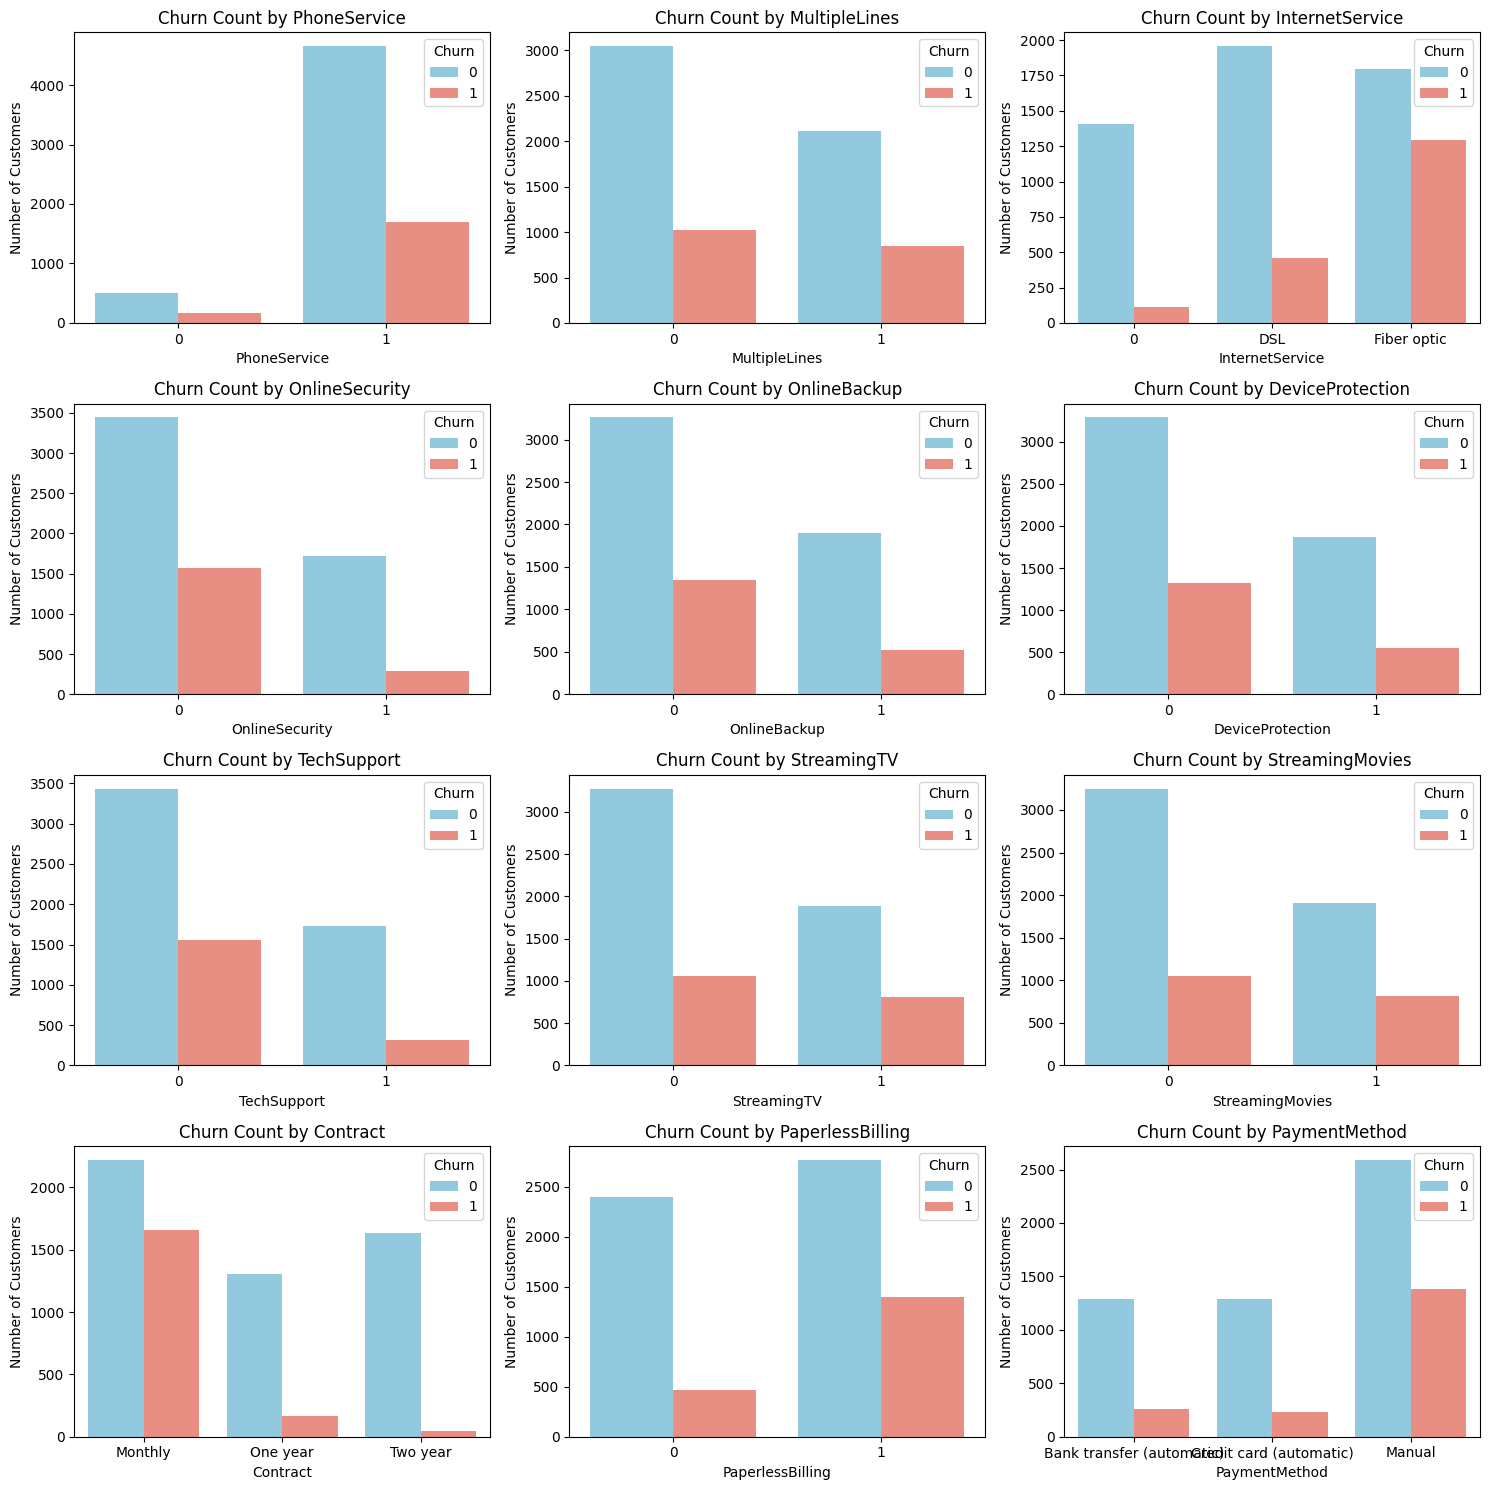

In [10]:
features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(15, 15))  # Single figure for all subplots

for sub_id, i in enumerate(features, 1):
    # Group and reset to long format
    count = df.groupby([i, 'Churn']).size().reset_index(name='Count')
    
    # Create subplot
    plt.subplot(4, 3, sub_id)
    sns.barplot(data=count, x=i, y='Count', hue='Churn', palette=['skyblue', 'salmon'])
    plt.title(f'Churn Count by {i}')
    plt.ylabel('Number of Customers')
    plt.xlabel(i)
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()



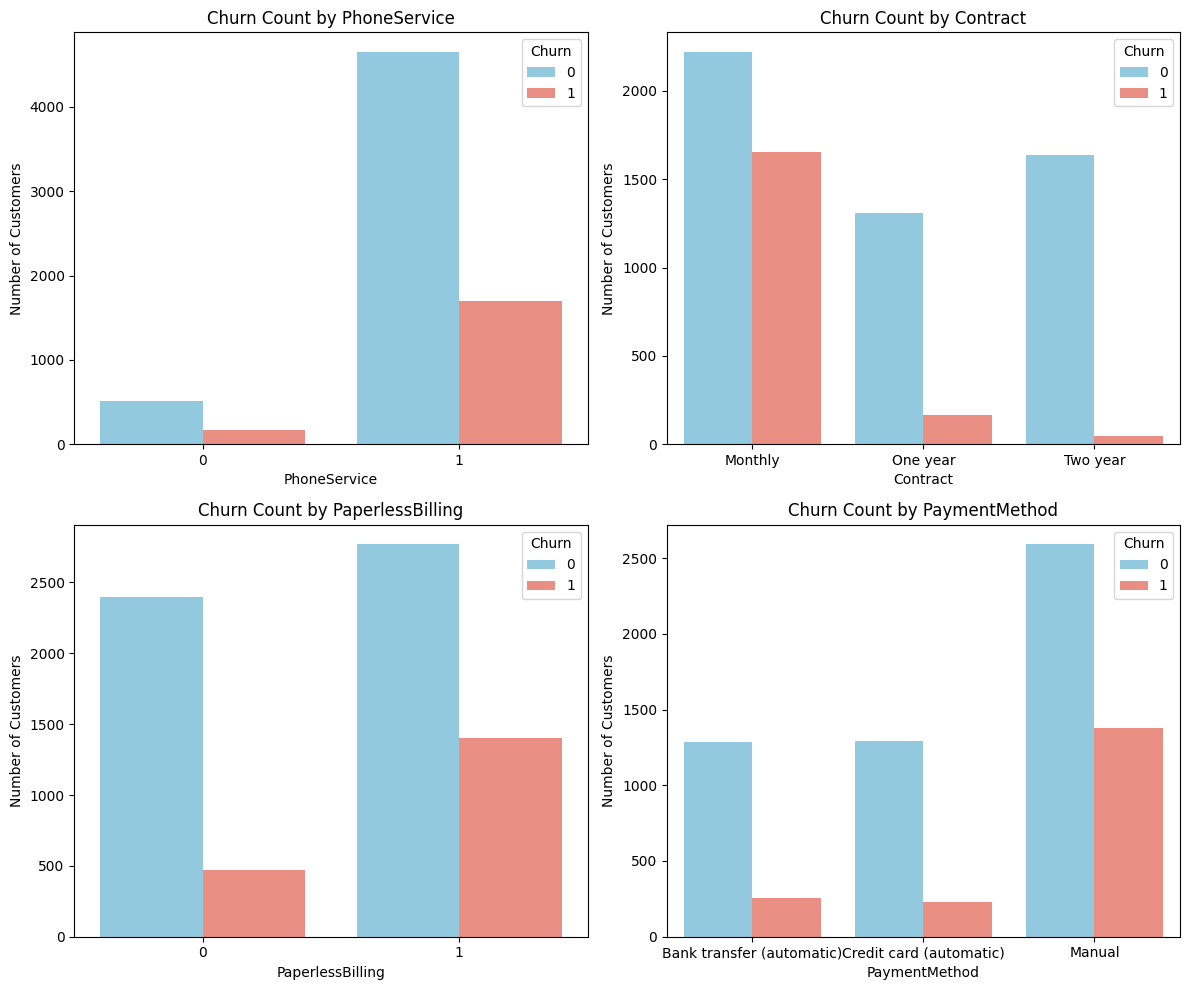

In [11]:
features = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plt.figure(figsize=(12, 10))

for sub_id, i in enumerate(features, 1):
    # Group and reset to long format
    count = df.groupby([i, 'Churn']).size().reset_index(name='Count')
    
    # Create subplot
    plt.subplot(2, 2, sub_id)
    sns.barplot(data=count, x=i, y='Count', hue='Churn', palette=['skyblue', 'salmon'])
    plt.title(f'Churn Count by {i}')
    plt.ylabel('Number of Customers')
    plt.xlabel(i)
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()


In [12]:

df[df['PhoneService'] == 0]['MultipleLines'].value_counts(),df[df['PhoneService'] == 1]['MultipleLines'].value_counts()

(MultipleLines
 0    680
 Name: count, dtype: int64,
 MultipleLines
 0    3385
 1    2967
 Name: count, dtype: int64)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   Tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

In [14]:
for i in df.select_dtypes(include = "object").columns:
    print(f"{i}unique values: {df[i].unique()}" )
df['InternetService'] = df['InternetService'].replace(0, "0")

Genderunique values: ['Female' 'Male']
InternetServiceunique values: ['DSL' 'Fiber optic' 0]
Contractunique values: ['Monthly' 'One year' 'Two year']
PaymentMethodunique values: ['Manual' 'Bank transfer (automatic)' 'Credit card (automatic)']


In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
for i in df.select_dtypes(include = "object").columns:
    data = ohe.fit_transform(df[[i]]).toarray()
    column=ohe.get_feature_names_out([i])
    df[column] = data
    df.drop(i, axis=1, inplace=True)
df.head(3)                                                     

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Gender_Male,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Monthly,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
0,0,1,0,1,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,34,1,0,1,0,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,1,1,0,0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

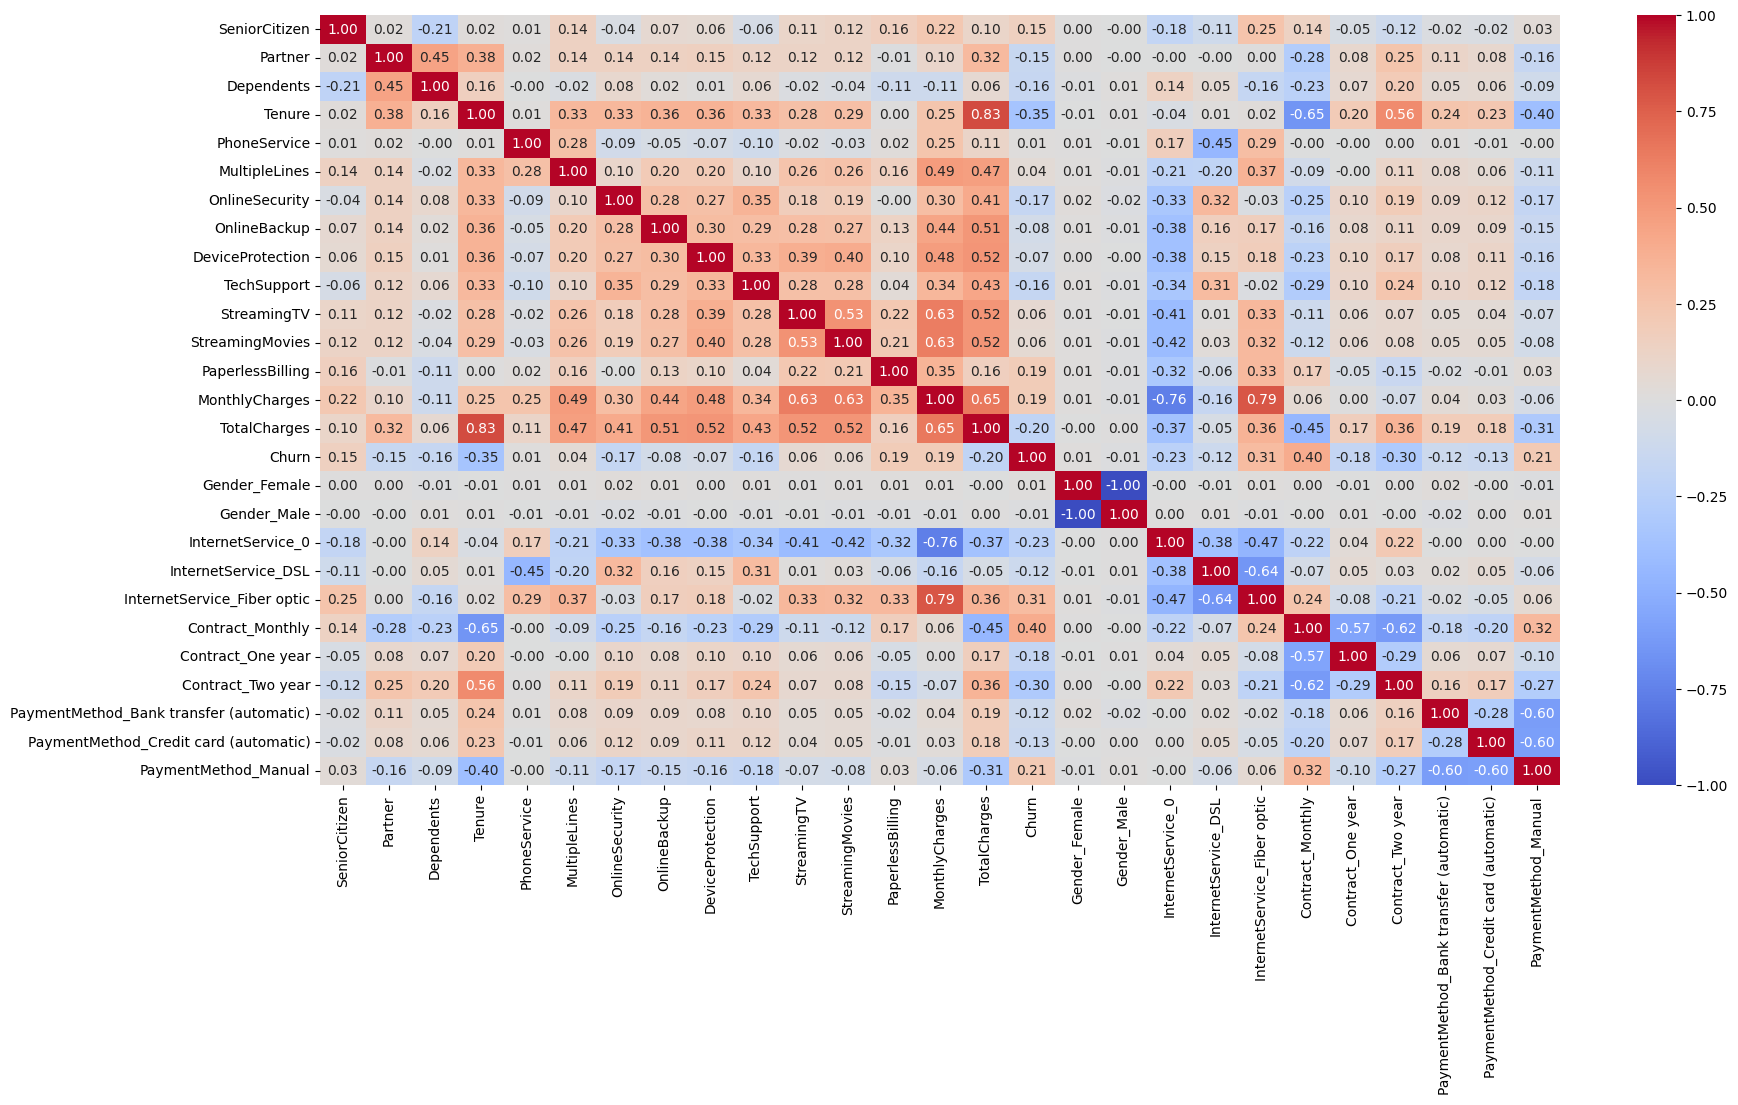

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.plot

In [20]:
x= df.drop("Churn", axis=1)

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlation(x, 0.90)

{'Gender_Male'}

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


se = StandardScaler()
ros = SMOTE()

df=df.drop(columns=['Gender_Male'])
x = df.drop(columns=["Churn"])
y = df["Churn"]
x,y = ros.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train = se.fit_transform(x_train)
x_test = se.transform(x_test)

# Define LogisticRegression and parameter grid
lr = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],
    'multi_class': ['multinomial']
}

# GridSearchCV
grid = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='f1')
grid.fit(x_train, y_train)

# Best model
best_lr = grid.best_estimator_

# Evaluation
cv_scores = cross_val_score(best_lr, x_train, y_train, cv=4)
y_pred = best_lr.predict(x_test)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.83397897 0.82789153 0.8223575  0.83010515]
Mean CV accuracy: 0.8285832872163807

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1563
           1       0.82      0.84      0.83      1535

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

Confusion Matrix:
 [[1270  293]
 [ 244 1291]]
